In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding, TSNE, SpectralEmbedding, Isomap, MDS
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

Unnamed: 0  id        lat        lon                           name  \
0           0   1  19.433571 -99.167809          1 RIO SENA-RIO BALSAS   
1           1   2  19.431386 -99.171695  2 RIO GUADALQUIVIR-RIO BALSAS   
2           2   3  19.431655 -99.158668          3 REFORMA-INSURGENTES   
3           3   4  19.428309 -99.171713          4 RIO NILO-RIO PANUCO   
4           4   5  19.429720 -99.169363         5 RIO PANUCO-RIO TIBER   

   Ciclo_Estacion_Retiro  Promedio_Edad  Tiempo_Promedio_Uso  Prop_Genero  \
0                    1.0      35.665144            12.266441     0.717827   
1                    2.0      35.992997            13.390122     0.757833   
2                    3.0      33.728253            80.473403     0.721324   
3                    4.0      34.660469            14.078443     0.735961   
4                    5.0      35.852218            14.753378     0.723268   

   distancia_estaciones  distancia_foro  distancia_centro  demanda_retiro  \
0              1.382296        8.643278          3.630725      197.774194   
1              1.624434        8.936849          4.038878       87.516129   
2              1.646449        7.677017          2.672663       41.903226   
3              1.444151        8.828864          4.066636       86.741935   
4              1.504440        8.644570          3.805603      101.064516   

   demanda_arribo  Hora_Pico  Dia_Semana_Pico  
0        6.379813       14.0              1.0  
1        2.823101        9.0              2.0  
2        1.351717       14.0              3.0  
3        2.798127       18.0              2.0  
4        3.260146       17.0              2.0

In [3]:
value_cols = [
    'Promedio_Edad', 'Tiempo_Promedio_Uso', 'Prop_Genero', 'distancia_estaciones', 'distancia_foro',
    'distancia_centro', 'demanda_retiro', 'demanda_arribo', 'Hora_Pico', 'Dia_Semana_Pico'
]
X = df[value_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

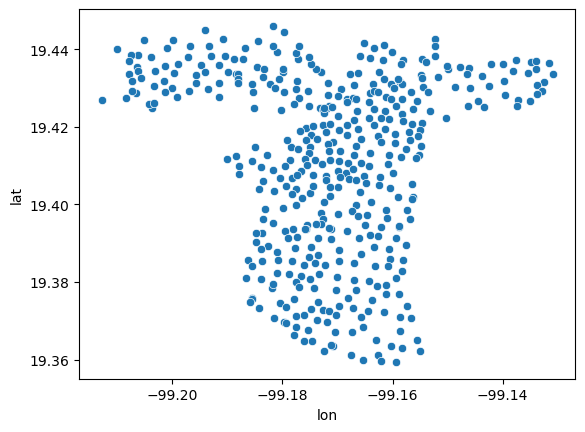

In [4]:
sns.scatterplot(
    x='lon',
    y='lat',
    data=df
)

plt.show()

In [15]:
def plot_projections(X_scaled, df, algorithm):
    alg = algorithm(n_components=2)
    X_alg = alg.fit_transform(X_scaled)
    alg_res = pd.DataFrame(X_alg, columns=['c1', 'c2'])
    alg_res = alg_res.join(df)
    alg_res['lat'] = alg_res['lat'].astype(float)
    alg_res['lon'] = alg_res['lon'].astype(float)
    
    sns.scatterplot(
        x='c1',
        y='c2',
        hue='lat',
        data=alg_res,
        palette='rocket'
    )
    plt.show()

    sns.scatterplot(
        x='c1',
        y='c2',
        hue='lon',
        data=alg_res,
        palette='rocket'
    )
    plt.show()

    sns.pairplot(alg_res[value_cols + ['c1', 'c2']], y_vars=['c1', 'c2'])
    plt.show()

C:\Users\osjom\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


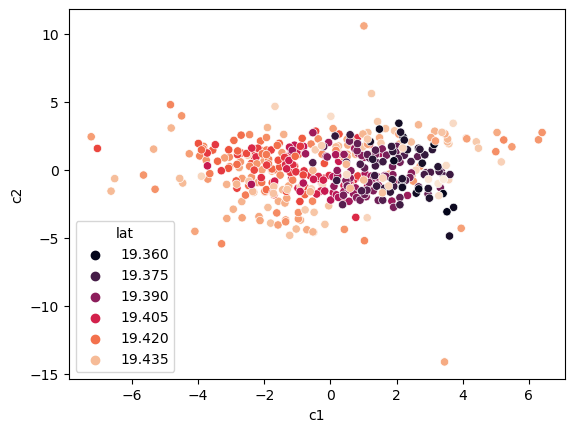

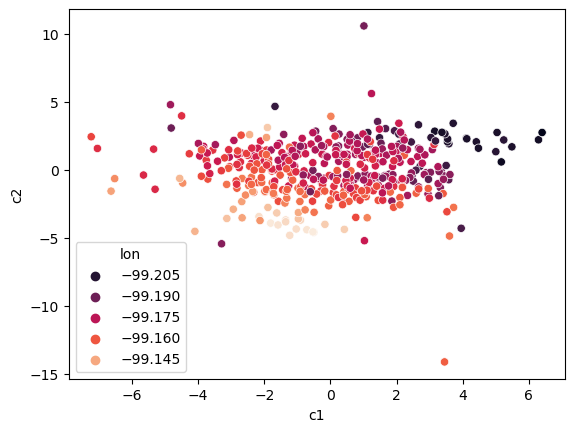

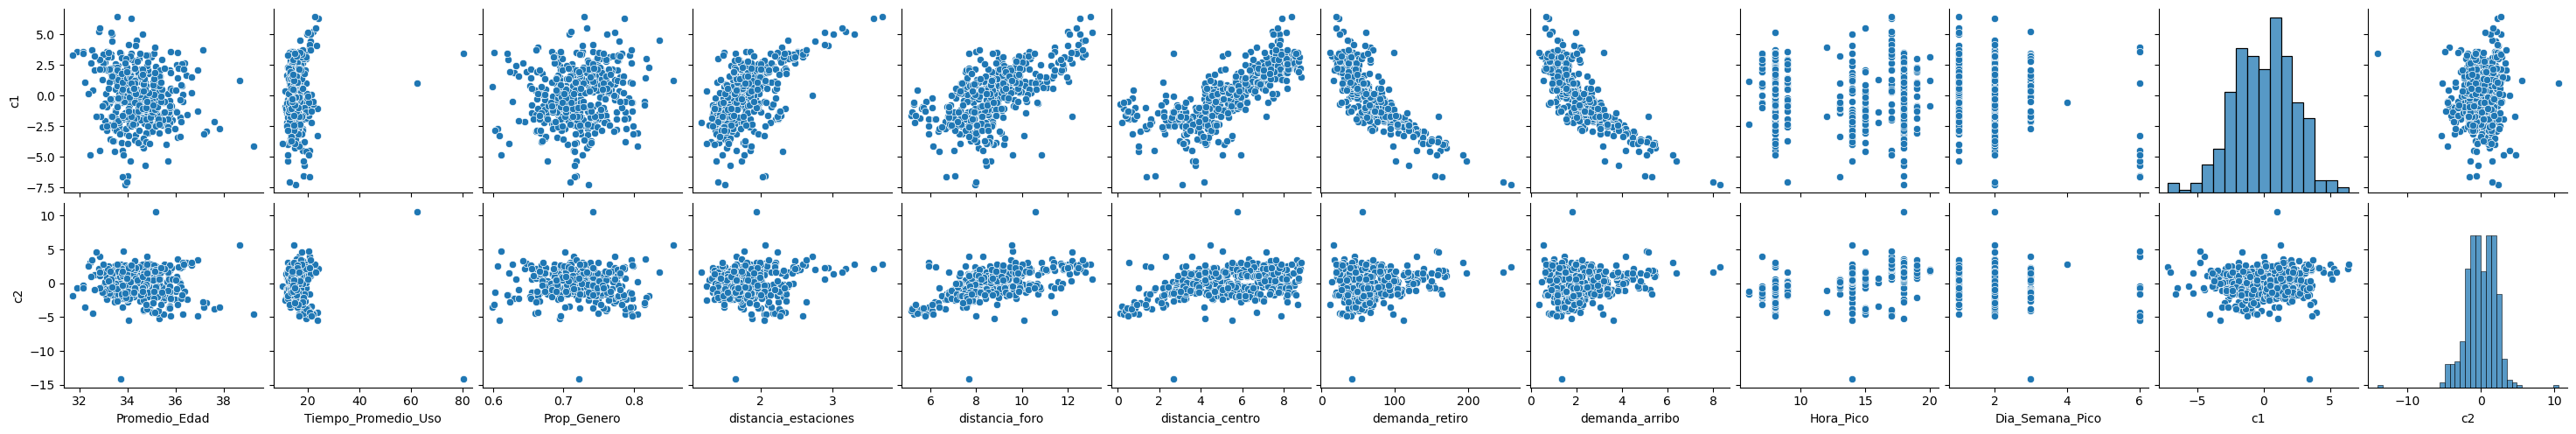

In [16]:
plot_projections(X_scaled, df, MDS)

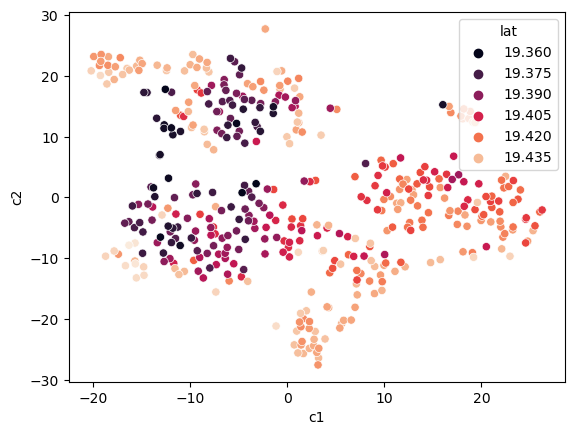

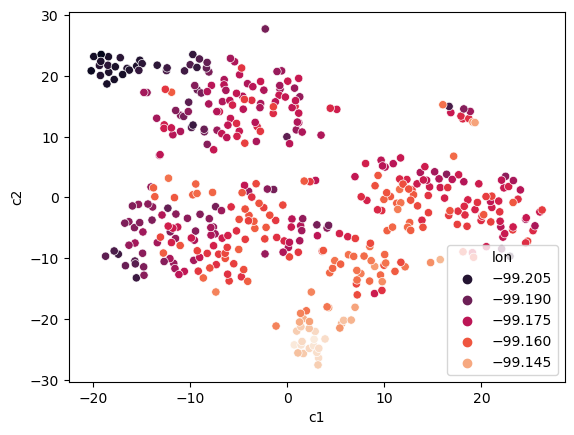

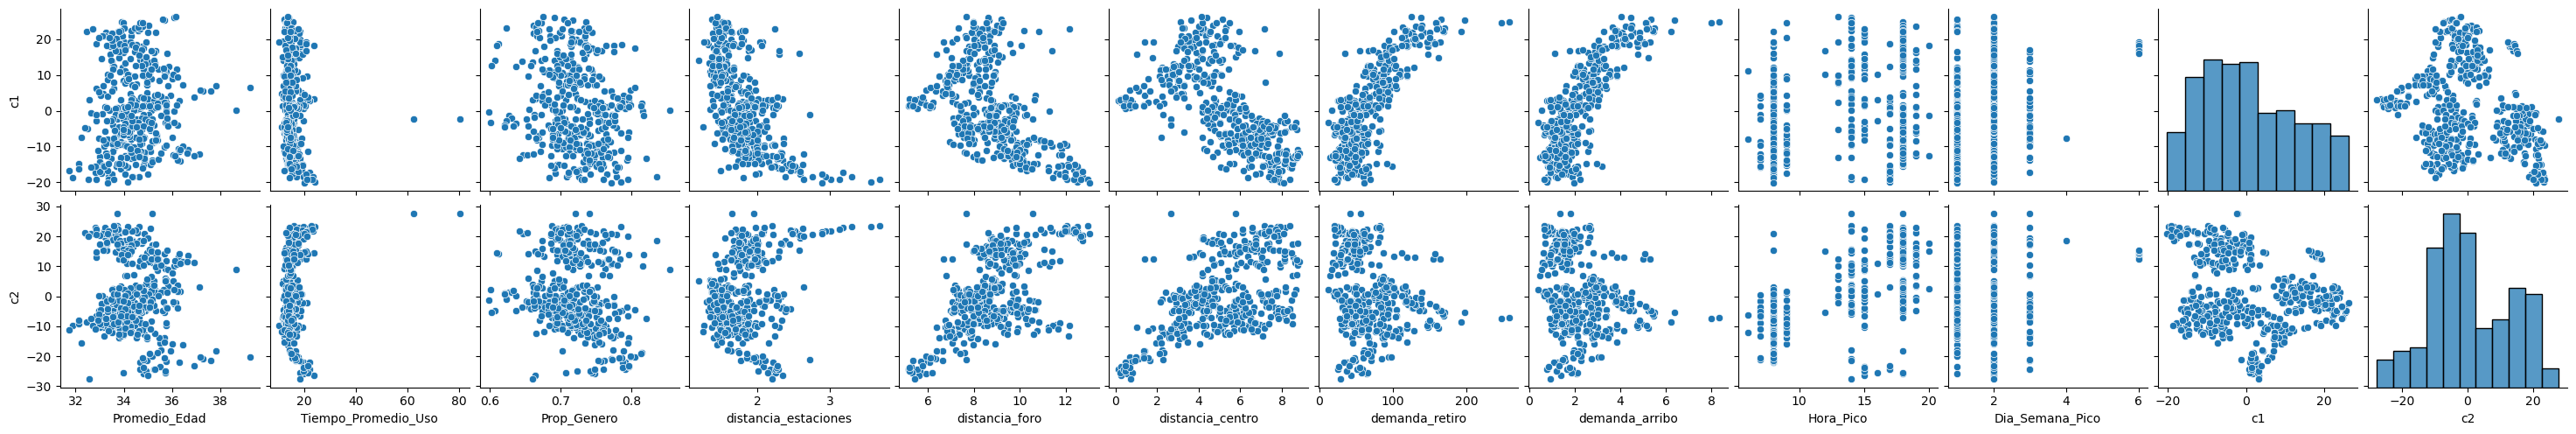

In [17]:
plot_projections(X_scaled, df, TSNE)

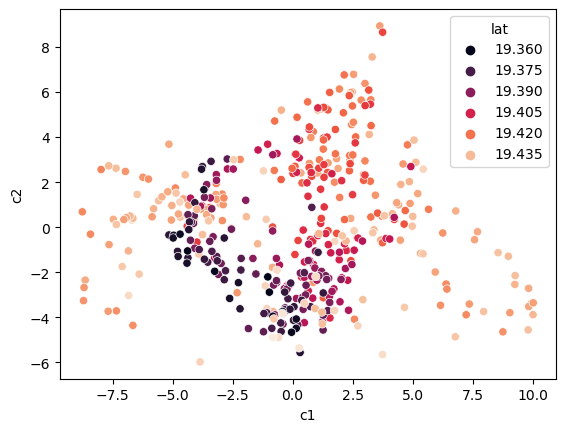

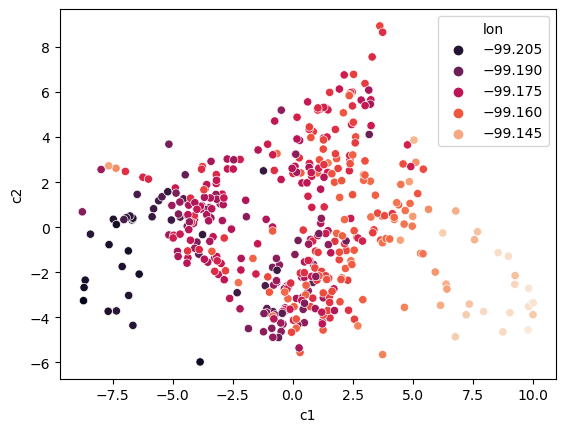

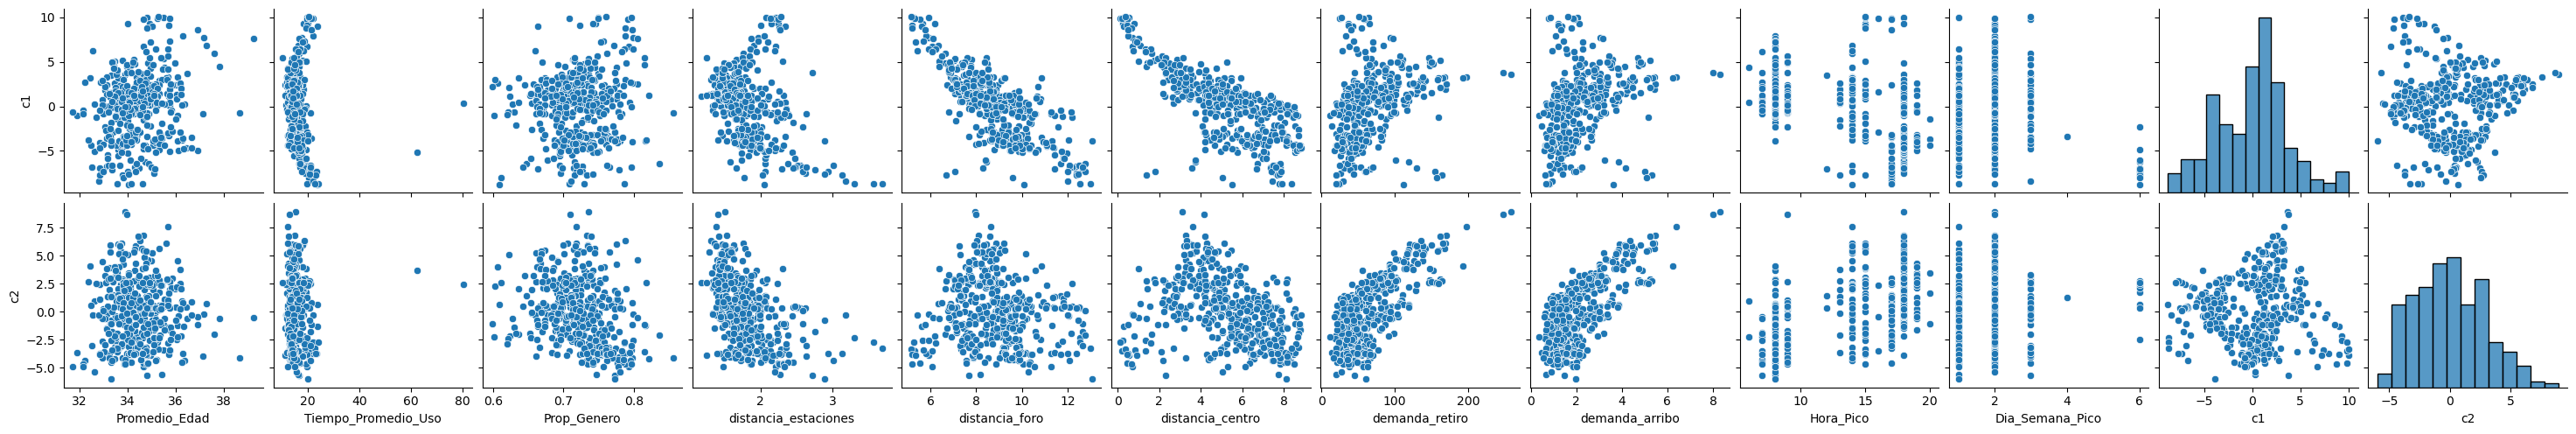

In [18]:
plot_projections(X_scaled, df, Isomap)

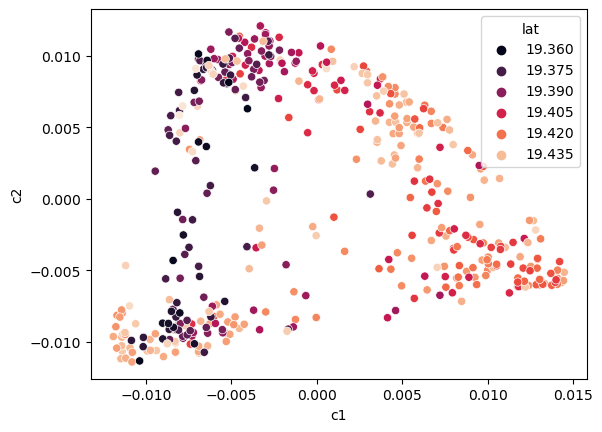

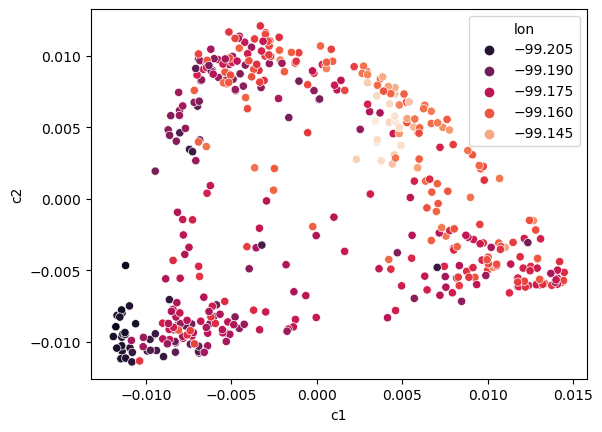

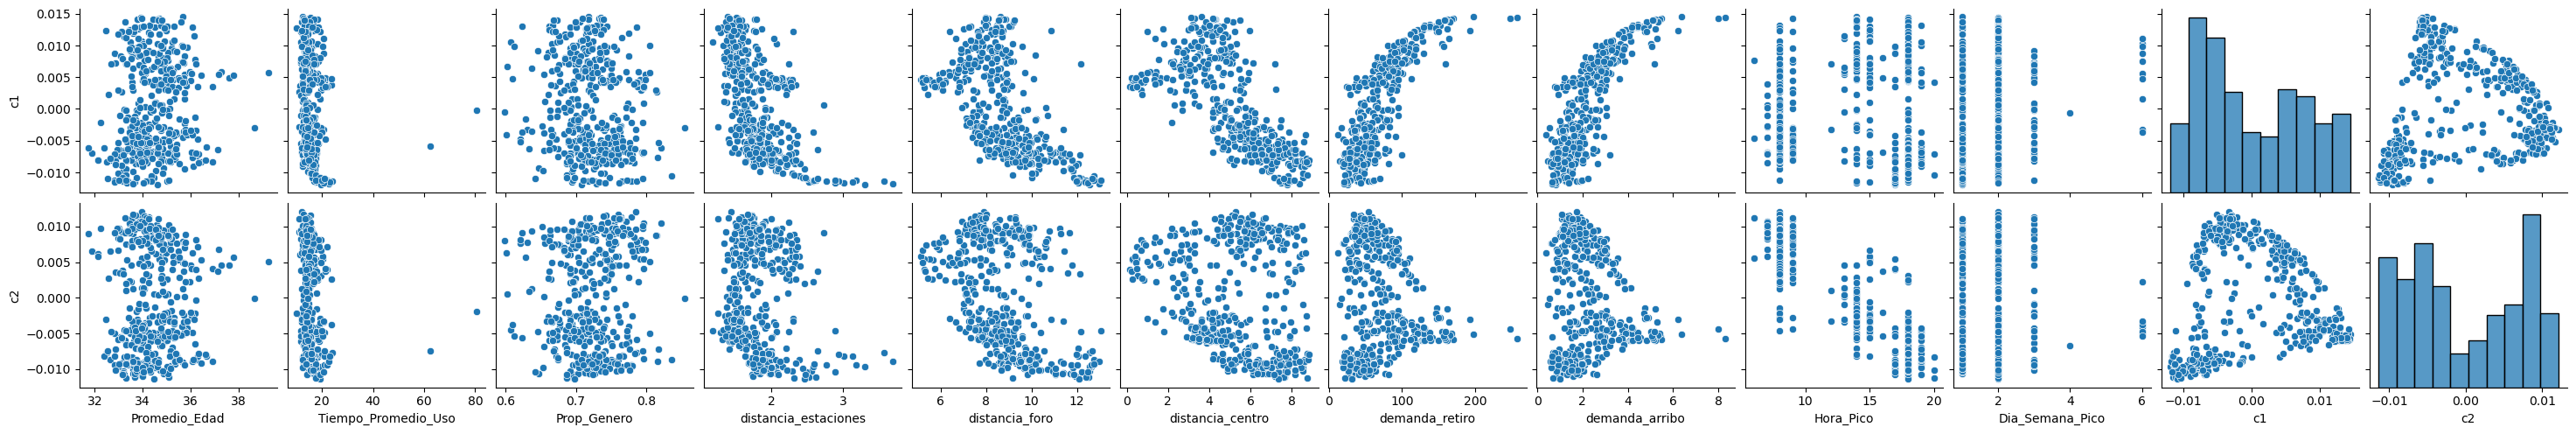

In [19]:
plot_projections(X_scaled, df, SpectralEmbedding)

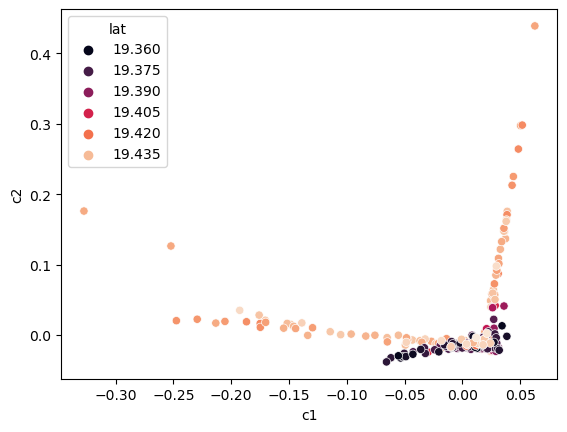

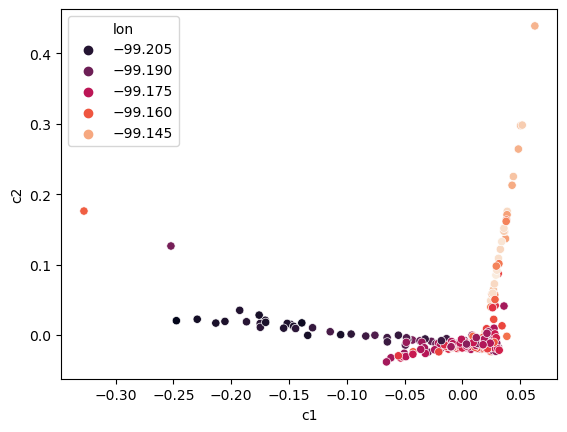

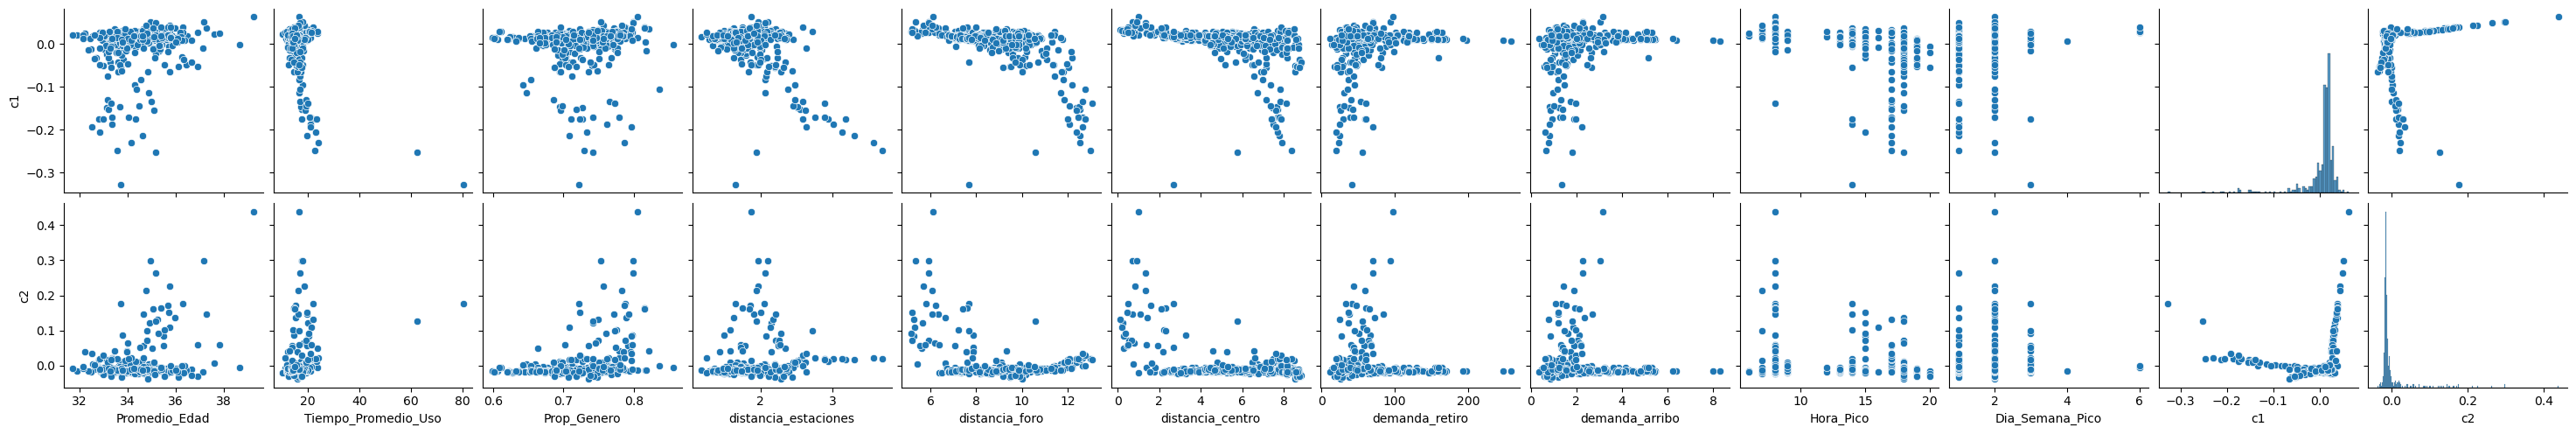

In [20]:
plot_projections(X_scaled, df, LocallyLinearEmbedding)

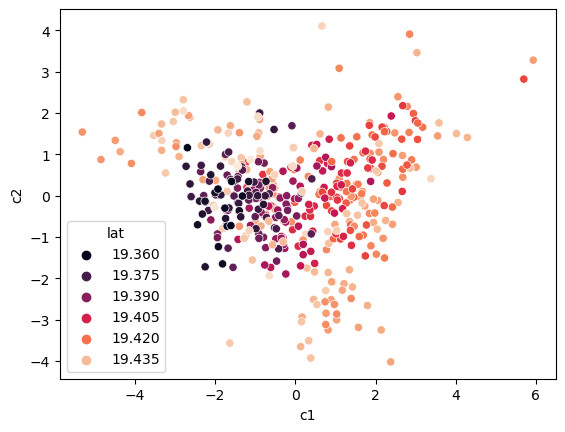

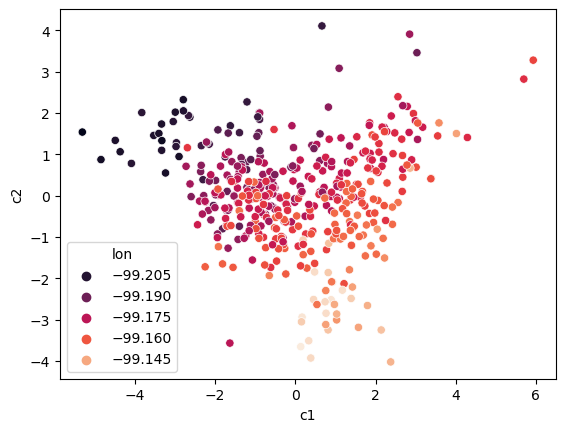

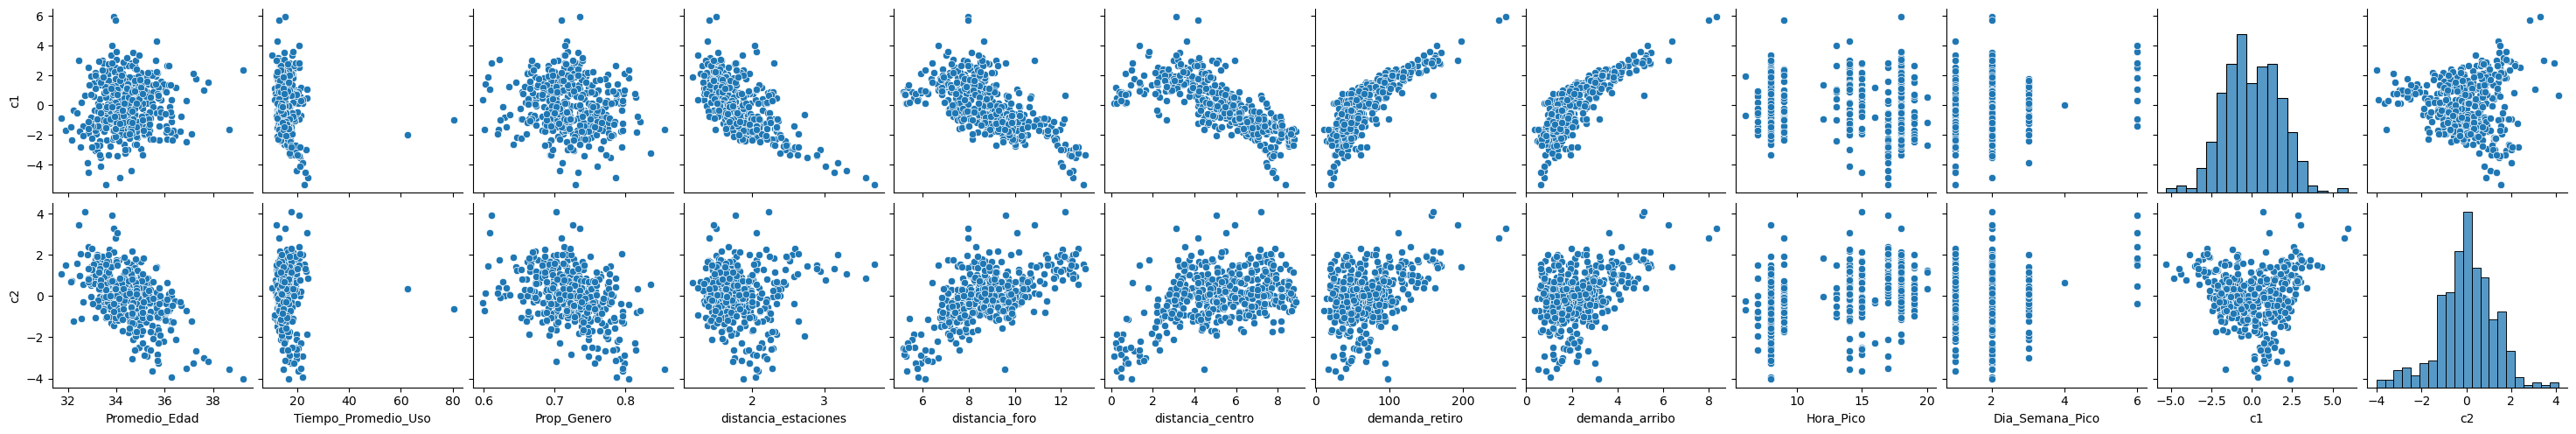

In [21]:
plot_projections(X_scaled, df, PCA)

## Escalamiento Multidimensional

In [35]:
agosto = pd.read_csv('data/ecobici_2023_08.csv')
agosto.head()

Genero_Usuario  Edad_Usuario     Bici Ciclo_Estacion_Retiro Fecha_Retiro  \
0              M          24.0  2252039                   007   31/07/2023   
1              M          33.0  8626897                   206   31/07/2023   
2              M          34.0  4940557                   215   31/07/2023   
3              F          30.0  2036523                   291   31/07/2023   
4              F          23.0  8079220                   546   31/07/2023   

  Hora_Retiro Ciclo_EstacionArribo Fecha Arribo Hora_Arribo  
0    23:52:38                  064   01/08/2023    00:00:03  
1    23:48:01                  212   01/08/2023    00:00:20  
2    23:55:50                  212   01/08/2023    00:00:30  
3    23:32:42                  082   01/08/2023    00:01:08  
4    23:51:09                  498   01/08/2023    00:01:21

In [36]:
agosto['hora_a'] = agosto['Hora_Arribo'].str[:2].astype('int')
agosto['Fecha Arribo'] = pd.to_datetime(agosto['Fecha Arribo'], format='%d/%m/%Y')

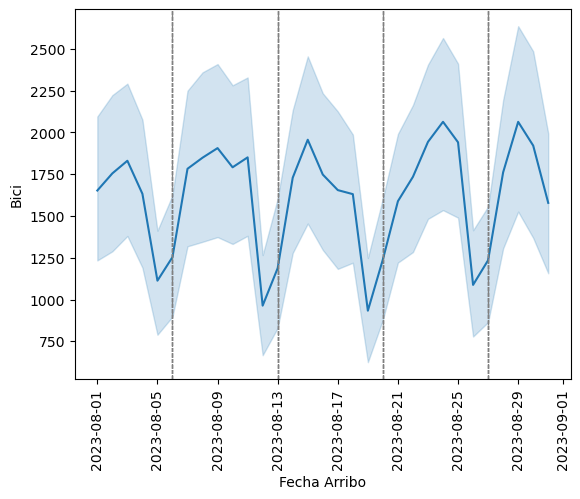

In [50]:
arribo_ag = agosto.groupby(['Fecha Arribo', 'hora_a'])['Bici'].count().reset_index()
sns.lineplot(data=arribo_ag, x='Fecha Arribo', y='Bici')
plt.xticks(rotation=90)


# Getting the Sundays
sundays = arribo_ag[arribo_ag['Fecha Arribo'].dt.dayofweek == 6]['Fecha Arribo']

# Plotting dotted vertical lines for Sundays
for sunday in sundays:
    plt.axvline(x=sunday, color='gray', linestyle='--', linewidth=0.75)

plt.show()

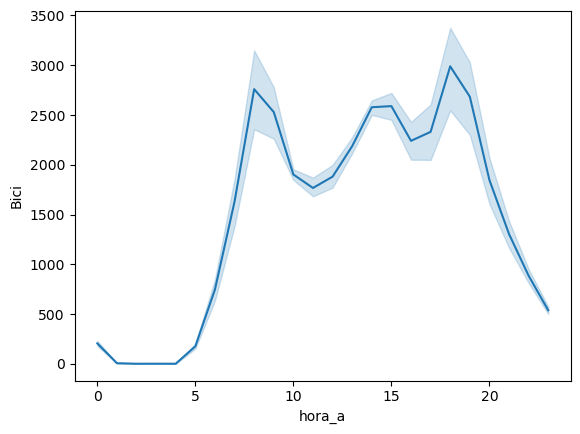

In [51]:
arribo_ag = agosto.groupby(['Fecha Arribo', 'hora_a'])['Bici'].count().reset_index()
sns.lineplot(data=arribo_ag, x='hora_a', y='Bici')
plt.show()

In [13]:
stations_demand = agosto.pivot_table(
    index='Fecha Arribo',
    columns='Ciclo_EstacionArribo',
    aggfunc='size',
    fill_value=0
)

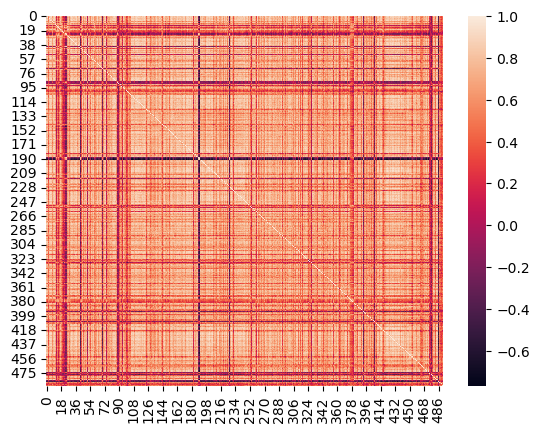

In [14]:
corr_df = stations_demand.corr()
D = corr_df.values
station_index = list(corr_df.columns)
sns.heatmap(D)
plt.show()

In [15]:
def escalamiento_multidimensional(D, k):
    n = D.shape[0]
    J = np.eye(n) - np.ones((n, n)) / n
    Gc = -0.5 * J @ D**2 @ J
    
    U, Sigma, Vt = np.linalg.svd(Gc)

    X = D @ Vt[:, :k]

    return X

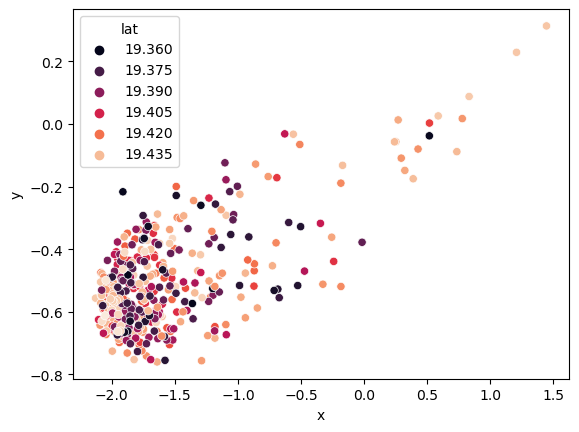

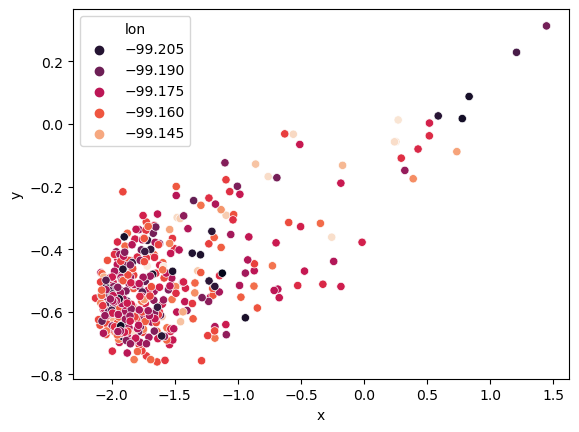

In [16]:
k = 2
em = pd.DataFrame(escalamiento_multidimensional(D, k), columns=['x', 'y']).join(df)
sns.scatterplot(
    x='x',
    y='y',
    hue='lat',
    palette='rocket',
    data=em
)
plt.show()

sns.scatterplot(
    x='x',
    y='y',
    hue='lon',
    palette='rocket',
    data=em
)
plt.show()